In [5]:
import pandas as pd
import os

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

## Pipeline for using machine learning on weather prediction dataset

In [10]:
# Read data
path_data = os.path.join('..', "dataset")
filename_data = os.path.join(path_data, "weather_prediction_dataset.csv")

In [11]:
data = pd.read_csv(filename_data)
data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


### split the data
We only select the first three years of data. We split into train and test, and then into X and y.

In [15]:
data_3years = data[:365*3].drop(columns=['DATE'])
data_train, data_test = train_test_split(data_3years, test_size=0.3, random_state=0)

In [16]:
features = data_train.columns[1:]
X = data_train[features]
y = data_train['MONTH']

In [19]:
# We give the pipeline tuples of step names, and step objects
pipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('model', KNeighborsClassifier(n_neighbors=3))
])

In [20]:
pipe.fit(X, y)

Pipeline(steps=[('scale', MinMaxScaler()),
                ('model', KNeighborsClassifier(n_neighbors=3))])

We can use this pipe directly to predict the class label, or plot a confusion matrix. We first plot the confusion matrix for the train set:

In [33]:
predictions = pipe.predict(X)
predictions[:10]

array([ 6,  3,  3,  1,  5,  3,  2,  1,  6, 11])

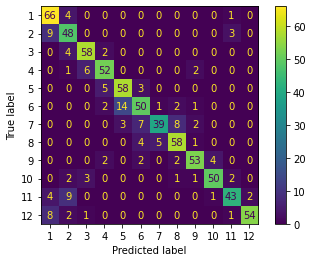

In [25]:
conf_mat = plot_confusion_matrix(pipe, X, y, labels=labels)

To now test in on our test set:

In [34]:
X_test = data_test[features]
y_test = data_test['MONTH']
pred_test = pipe.predict(X_test)

We plot a confusion matrix for the predictions on the test set. To make sure the classes are nicely ordered, we define the labels explitely.

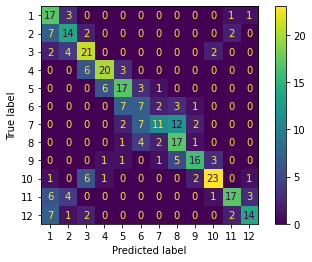

In [35]:
labels = y.unique()
labels = labels.sort()

conf_mat = plot_confusion_matrix(pipe, X_test, y_test, labels=labels)

It seems that the confusion matrix is worse than the one on the train set, but it is difficult to draw this conclusion from the confusion matrix alone. It would be nice to have one score that expresses how well our model does.

We calculate *accuracy*: this is the number of correctly labeled instances, divided the total number of instances. Note that this score works well when we have a balanced dataset (similar number of instances per class) but if we have imbalanced class, the majority class can dominate the score.

In [28]:
from sklearn.metrics import accuracy_score

In [36]:
pred_test = pipe.predict(X_test)
print('Train accuracy:', accuracy_score(y, predictions))
print('Test accuracy:', accuracy_score(y_test, pred_test))

Train accuracy: 0.8211488250652742
Test accuracy: 0.5896656534954408


So it turns out our model does not perform so well in real life afer all..
This is called 'overfitting'